In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv("C:/Users/Hanush/Downloads/archive (10).zip")

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [24]:
dict_species={'Iris-setosa':0.0,'Iris-versicolor':1.0,'Iris-virginica':2.0}
df.replace({'species':dict_species},inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [25]:
x=df.drop(['species'],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y=df['species']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['mse'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [29]:
RFC_reg.best_params_

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 50}

In [30]:
reg=RandomForestRegressor(n_estimators=125,criterion='mse',max_depth=5)

In [31]:
reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=125)

In [32]:
y_pred=reg.predict(x_test)

In [33]:
y_pred

array([0.96 , 1.544, 1.992, 1.   , 2.   , 1.   , 2.   , 1.   , 0.   ,
       2.   , 1.   , 0.   , 0.   , 0.   , 0.96 , 1.864, 0.   , 0.   ,
       0.   , 1.   , 0.   , 1.   , 2.   , 0.   , 1.   , 2.   , 0.   ,
       1.616, 2.   , 1.   , 0.96 , 2.   , 0.96 , 0.   , 0.96 , 2.   ,
       0.   , 0.   , 0.96 , 1.944, 0.   , 2.   , 0.   , 0.   , 1.616,
       0.912, 2.   , 1.544, 1.544, 2.   , 0.96 , 0.   , 0.   , 1.544,
       1.992, 0.   , 0.   , 0.   , 1.416, 2.   , 0.   , 2.   , 2.   ,
       0.   , 1.   , 1.   , 1.616, 1.   , 2.   , 0.   , 2.   , 1.   ,
       2.   , 1.   , 0.96 , 1.   , 0.   , 1.   , 0.96 , 0.   , 1.   ,
       1.992, 2.   , 0.   , 0.96 , 2.   , 1.544, 0.   , 2.   , 0.   ,
       1.416, 2.   , 1.992, 1.   , 1.992, 1.   , 1.   , 1.872, 1.992,
       0.   , 1.   , 1.352, 0.04 , 1.   , 2.   ])

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9479758108108108

In [35]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,81,1.0,0.960,0
1,133,2.0,1.544,1
2,137,2.0,1.992,2
3,75,1.0,1.000,3
4,109,2.0,2.000,4
5,96,1.0,1.000,5
6,105,2.0,2.000,6
7,66,1.0,1.000,7
8,0,0.0,0.000,8
9,122,2.0,2.000,9


[]

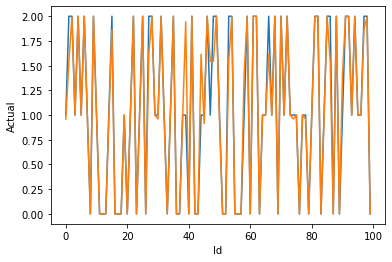

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

In [37]:
new=[[4.6,3.1,1.5,0.2]]
real=reg.predict(new)
real

array([0.])